In [26]:
#importing the common libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from sklearn.decomposition import PCA
import os
import json

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

#importing the library for graphs
import networkx as nx

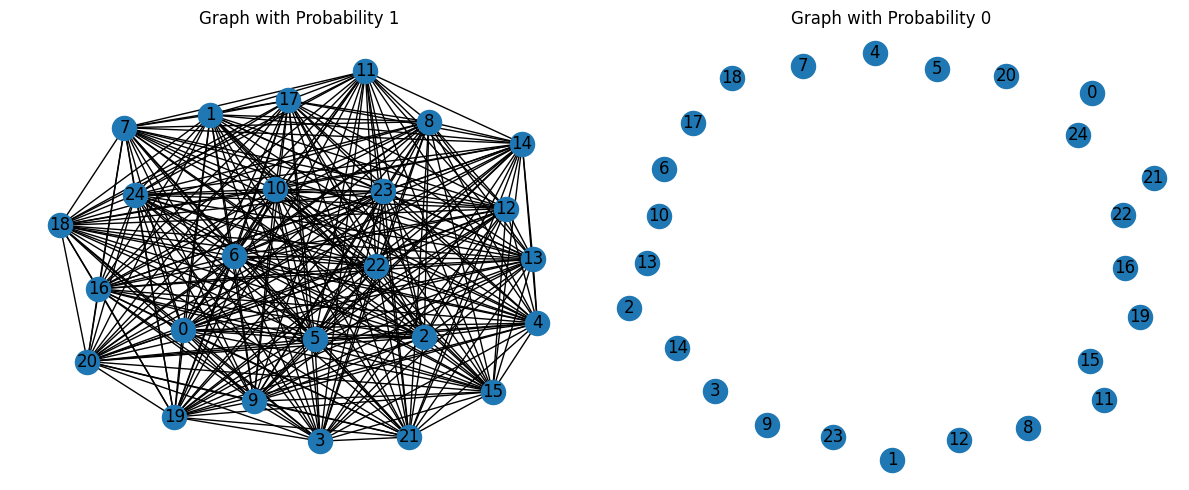

In [27]:
#plotting 2 graphs in the subplots to show difference between the prob feature of the erdos reyni graph

# Create the first graph with probability 0.25
G1 = nx.erdos_renyi_graph(25, 1, seed=1)

# Create the second graph with probability 0
G2 = nx.erdos_renyi_graph(25, 0, seed=2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
ax1 = axes[0]
ax1.set_title('Graph with Probability 1')
nx.draw(G1, with_labels=True, ax=ax1)

# Plot the second graph
ax2 = axes[1]
ax2.set_title('Graph with Probability 0')
nx.draw(G2, with_labels=True, ax=ax2)

# Adjust layout and display
plt.tight_layout()
plt.show()


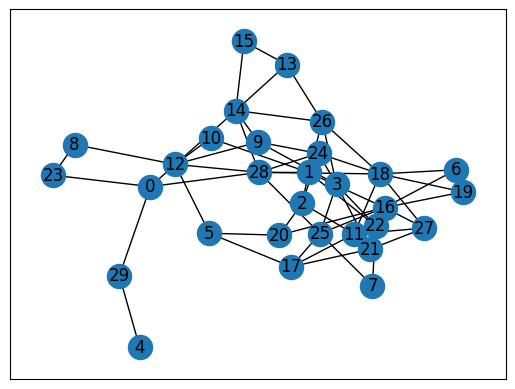

In [28]:
#importing the common libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from sklearn.decomposition import PCA
import os
import json

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

#importing the library for graphs
import networkx as nx

# Generate an Erdos-Renyi graph
n = 30
p = 0.15
G = nx.erdos_renyi_graph(n=n, p=p, seed=10) #this graph takes in the number of nodes and the probability
nx.draw_networkx(G, nx.spring_layout(G, seed=0))

In [29]:
# Function to generate random walk
def generate_random_walk(start_node, walk_length, graph):
    walk_sequence = [start_node]
    for _ in range(walk_length):
        neighbors = [neighbor_node for neighbor_node in graph.neighbors(start_node)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk_sequence.append(next_node)
        start_node = next_node
    return walk_sequence

# Generate random walk sequences
sequences = []
for _ in range(100):
    sequences.append(generate_random_walk(np.random.choice(n), 10, G))

In [30]:
sequences

[[27, 11, 21, 16, 19, 6, 19, 16, 1, 10, 12],
 [2, 24, 28, 18, 6, 18, 28, 0, 28, 24, 2],
 [24, 18, 24, 28, 1, 10, 12, 5, 20, 5, 20],
 [29, 0, 28, 18, 28, 25, 3, 24, 18, 11, 27],
 [14, 9, 12, 9, 24, 9, 3, 25, 17, 11, 18],
 [7, 22, 21, 11, 18, 6, 18, 19, 6, 16, 6],
 [17, 25, 16, 25, 3, 21, 3, 24, 2, 24, 28],
 [17, 21, 27, 18, 27, 16, 6, 16, 6, 18, 28],
 [13, 14, 26, 3, 22, 1, 2, 24, 28, 25, 3],
 [23, 8, 23, 8, 23, 0, 28, 24, 3, 26, 13],
 [3, 9, 12, 9, 24, 9, 3, 9, 14, 13, 14],
 [3, 21, 22, 21, 22, 7, 22, 16, 6, 19, 16],
 [0, 23, 8, 12, 10, 12, 28, 14, 26, 3, 25],
 [17, 5, 17, 25, 3, 24, 18, 27, 11, 21, 16],
 [8, 12, 8, 12, 5, 12, 10, 1, 16, 25, 28],
 [27, 18, 11, 2, 20, 16, 22, 7, 25, 28, 25],
 [16, 20, 2, 24, 28, 14, 28, 25, 28, 12, 8],
 [24, 18, 24, 9, 24, 28, 1, 22, 21, 11, 17],
 [0, 14, 0, 23, 0, 28, 14, 28, 24, 3, 25],
 [9, 3, 24, 18, 26, 3, 24, 28, 18, 28, 1],
 [3, 21, 27, 18, 24, 28, 25, 16, 20, 5, 17],
 [6, 18, 19, 16, 19, 6, 16, 22, 21, 11, 27],
 [27, 16, 19, 6, 19, 18, 26, 14, 2

First Random Walk: [27, 11, 21, 16, 19, 6, 19, 16, 1, 10, 12]


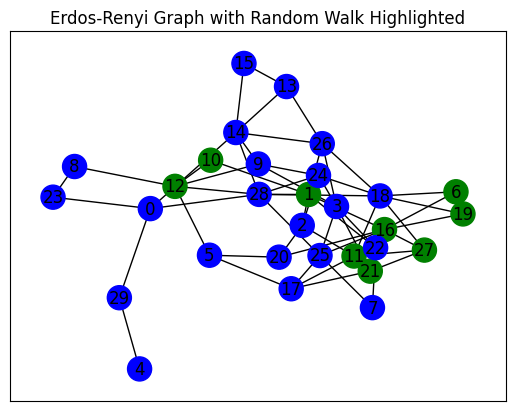

In [31]:
# Convert nodes in the walk sequence to integers
walk_sequence_int = set(int(node) for node in sequences[0])
print(f"First Random Walk: {sequences[0]}")

# Create a color map to color the nodes in the walk sequence differently
color_map = ['green' if node in walk_sequence_int else 'blue' for node in list(G.nodes())]

# Plot the graph with colored nodes
pos = nx.spring_layout(G, seed=0)  # Using seed for reproducibility
nx.draw_networkx(G, pos, node_color=color_map, with_labels=True)
plt.title("Erdos-Renyi Graph with Random Walk Highlighted")
plt.show()


## Using the skip-gram model to train the embeddings

In [32]:
#using gensim to create the embeddings

from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sequences,
                     vector_size=100,
                     window=2,
                     sg=1,
                     min_count=1,
                     seed=1)

In [34]:
model.build_vocab(sequences)

In [35]:
model.train(sequences, total_examples=model.corpus_count, epochs=50, report_delay=1)

(11047, 55000)

In [36]:
print('Nodes that are the most similar to node 22:')

for similarity in model.wv.most_similar(positive=[22]):
    print(similarity)

Nodes that are the most similar to node 22:
(11, 0.9970037341117859)
(7, 0.9969649314880371)
(25, 0.9960829615592957)
(16, 0.9959891438484192)
(17, 0.9957842230796814)
(21, 0.9957743883132935)
(20, 0.9951438903808594)
(3, 0.9949280023574829)
(1, 0.9946369528770447)
(2, 0.9940782785415649)


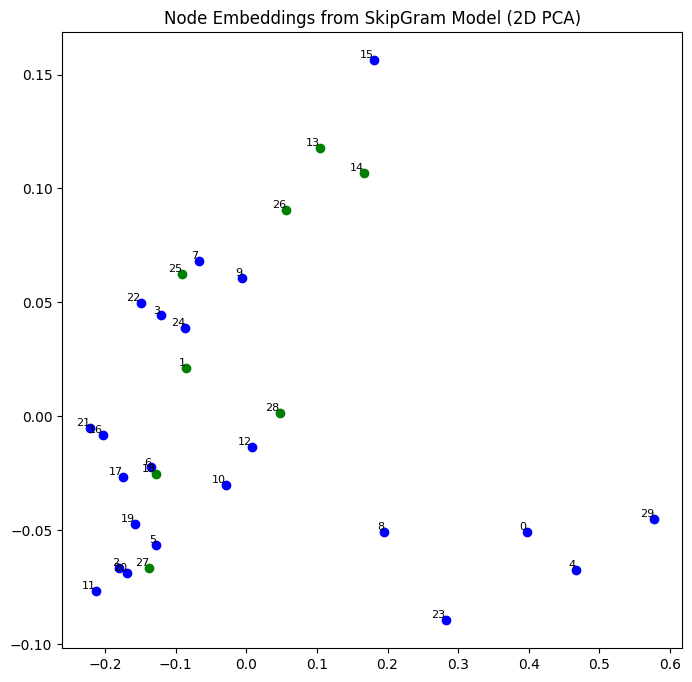

In [19]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Get node embeddings
node_embeddings = {node: model.wv[node] for node in list(G.nodes())}

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
node_embeddings_2d = pca.fit_transform(list(node_embeddings.values()))

# Visualize embeddings
plt.figure(figsize=(8, 8))
for (node, color), (x, y) in zip(zip(G.nodes(), set(G.nodes())), node_embeddings_2d):
    node_color = 'green' if node in walk_sequence_int else 'blue'
    plt.scatter(x, y, color=node_color)
    plt.text(x, y, str(node), fontsize=8, ha='right', va='bottom')

plt.title("Node Embeddings from SkipGram Model (2D PCA)")
plt.show()


In [ ]:
node_embeddings_2d

array([[-0.00924275,  0.01558789],
       [-0.02117723, -0.00381356],
       [ 0.02359443,  0.03190856],
       [-0.01669131, -0.00875003],
       [-0.00189981,  0.01654639],
       [ 0.01380592, -0.02491926],
       [ 0.00090088, -0.00892659],
       [-0.01802823, -0.00735009],
       [-0.01443393, -0.00991417],
       [ 0.0144477 , -0.00619563],
       [-0.00853626,  0.00842572],
       [-0.01177709, -0.01292128],
       [ 0.00265883,  0.02237688],
       [ 0.01687182, -0.00908627],
       [-0.00262675, -0.02095395],
       [ 0.03316965, -0.00148917],
       [ 0.02135653, -0.00614028],
       [ 0.0273243 ,  0.00359653],
       [ 0.00835708, -0.03497018],
       [-0.00639589,  0.03559085],
       [-0.02906863,  0.00495742],
       [-0.00807589, -0.00804885],
       [ 0.0060476 ,  0.01729782],
       [-0.02530732,  0.00456242],
       [ 0.00472636,  0.00262883]])

In [ ]:
walk_sequence_int

{2, 4, 6, 10, 12, 16, 17, 22, 23}

## Creating an interactive widget

In [37]:
def generate_random_walk(start_node, walk_length, graph):
    walk_sequence = [start_node]
    for _ in range(walk_length):
        neighbors = [neighbor_node for neighbor_node in graph.neighbors(start_node)]
        if not neighbors:
            break
        next_node = np.random.choice(neighbors, 1)[0]
        walk_sequence.append(next_node)
        start_node = next_node
    return walk_sequence

def train_word2vec(sequences, vector_size, graph):
    model = Word2Vec(sentences=sequences,
                     vector_size=vector_size,
                     window=2,
                     sg=1,
                     min_count=1,
                     seed=1)
    model.build_vocab(sequences)
    model.train(sequences, total_examples=model.corpus_count, epochs=100, report_delay=1)

    print("creatig node embeddings")
    node_embeddings = {node: model.wv[node] for node in list(graph.nodes())}

    return node_embeddings

def dimension_reduction_using_pca(node_embeddings):

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)

    node_embeddings_2d = pca.fit_transform(list(node_embeddings.values()))

    # Visualize embeddings
    plt.figure(figsize=(8, 8))
    for (node, color), (x, y) in zip(zip(G.nodes(), set(G.nodes())), node_embeddings_2d):
        plt.scatter(x, y, color='blue')
        plt.text(x, y, str(node), fontsize=8, ha='right', va='bottom')

    plt.title("Node Embeddings from SkipGram Model (2D PCA)")
    plt.show()

In [23]:
def generate_graph_and_visualize(num_nodes, probability, walk_length, vector_size):

    # Generate an Erdos-Renyi graph
    G = nx.erdos_renyi_graph(num_nodes, probability, seed=10)

    # Draw the graph
    plt.figure(figsize=(8, 8))
    nx.draw_networkx(G, nx.spring_layout(G, seed=0), with_labels=True)
    plt.title("Erdos-Renyi Graph")
    plt.show()

    print(G.nodes())

    # Generate random walk sequences
    sequences = []
    for _ in range(100):
        sequences.append(generate_random_walk(np.random.choice(num_nodes), walk_length, G))

    # Train word2vec model
    embeddings = train_word2vec(sequences, vector_size, G)

    #decomposition using pca
    dimension_reduction_using_pca(embeddings)

# Create sliders
num_nodes_slider = widgets.IntSlider(value=25, min=10, max=50, step=1, description='Num Nodes:')
probability_slider = widgets.FloatSlider(value=0.15, min=0, max=1, step=0.01, description='Probability:')
walk_length_slider = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Walk Length:')
vector_size_slider = widgets.IntSlider(value=100, min=10, max=200, step=10, description='Vector Size:')

# Create the interactive function
interact(generate_graph_and_visualize,
         num_nodes=num_nodes_slider,
         probability=probability_slider,
         walk_length=walk_length_slider,
         vector_size=vector_size_slider);


interactive(children=(IntSlider(value=25, description='Num Nodes:', max=50, min=10), FloatSlider(value=0.15, d…

In [42]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from ipywidgets import interact, widgets

def generate_random_walk(start_node, walk_length, graph):
    walk_sequence = [start_node]
    for _ in range(walk_length):
        neighbors = [neighbor_node for neighbor_node in graph.neighbors(start_node)]
        if not neighbors:
            break
        next_node = np.random.choice(neighbors, 1)[0]
        walk_sequence.append(next_node)
        start_node = next_node
    return walk_sequence

def train_word2vec(sequences, vector_size, graph):
    model = Word2Vec(sentences=sequences,
                     vector_size=vector_size,
                     window=2,
                     sg=1,
                     min_count=1,
                     seed=1)
    model.build_vocab(sequences)
    model.train(sequences, total_examples=model.corpus_count, epochs=100, report_delay=1)

    node_embeddings = {node: model.wv[node] for node in list(graph.nodes())}

    return node_embeddings

def dimension_reduction_using_pca(node_embeddings):
    pca = PCA(n_components=2)
    node_embeddings_2d = pca.fit_transform(list(node_embeddings.values()))

    return node_embeddings_2d

def generate_graph_and_visualize(num_nodes, probability, walk_length, vector_size):
    # Generate an Erdos-Renyi graph
    G = nx.erdos_renyi_graph(num_nodes, probability, seed=10)

    # Generate random walk sequences
    sequences = []
    for _ in range(100):
        sequences.append(generate_random_walk(np.random.choice(num_nodes), walk_length, G))

    # Train word2vec model
    embeddings = train_word2vec(sequences, vector_size, G)

    # Plot the graphs in a subplot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the original graph
    axes[0].set_title("Erdos-Renyi Graph")
    nx.draw_networkx(G, nx.spring_layout(G, seed=0), with_labels=True, ax=axes[0])

    # Plot the node embeddings using PCA
    axes[1].set_title("Node Embeddings from SkipGram Model (2D PCA)")
    node_embeddings_2d = dimension_reduction_using_pca(embeddings)
    for (node, _), (x, y) in zip(zip(G.nodes(), set(G.nodes())), node_embeddings_2d):
        axes[1].scatter(x, y, color='blue')
        axes[1].text(x, y, str(node), fontsize=8, ha='right', va='bottom')

    plt.show()

# Create sliders
num_nodes_slider = widgets.IntSlider(value=30, min=10, max=50, step=1, description='Num Nodes:')
probability_slider = widgets.FloatSlider(value=0.15, min=0, max=1, step=0.01, description='Probability:')
walk_length_slider = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Walk Length:')
vector_size_slider = widgets.IntSlider(value=100, min=10, max=200, step=10, description='Vector Size:')

# Create the interactive function
interact(generate_graph_and_visualize,
         num_nodes=num_nodes_slider,
         probability=probability_slider,
         walk_length=walk_length_slider,
         vector_size=vector_size_slider);


interactive(children=(IntSlider(value=30, description='Num Nodes:', max=50, min=10), FloatSlider(value=0.15, d…

## Understanding the karate club data

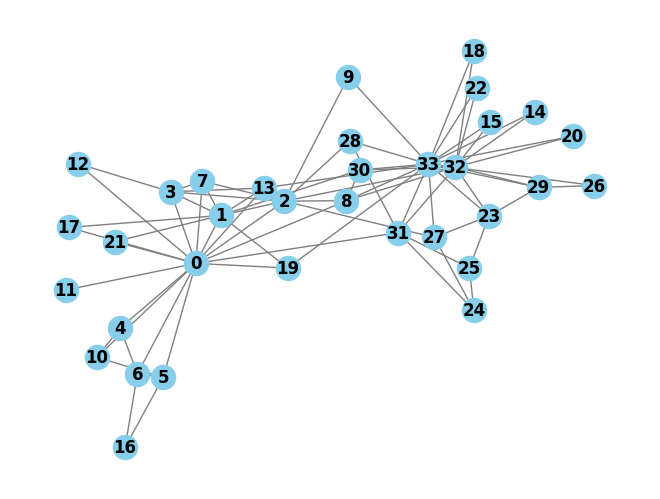

In [91]:
# Load the Karate Club dataset
G = nx.karate_club_graph()

# Draw the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', font_weight='bold')

# Show the plot
plt.show()


In [108]:
G.nodes()[1]

{'club': 'Mr. Hi'}

In [109]:
import networkx as nx

# Load the Karate Club dataset
G = nx.karate_club_graph()

# Get the edges and node labels
edges = list(G.edges())
node_labels = nx.get_node_attributes(G, 'club')

# Print the edges along with node labels
print("Karate Club Edges with Node Labels:")
for edge in edges:
    node1_label = node_labels[edge[0]]
    node2_label = node_labels[edge[1]]
    print(f"Edge: {edge}, Node Labels: ({node1_label}, {node2_label})")
""

Karate Club Edges with Node Labels:
Edge: (0, 1), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 2), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 3), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 4), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 5), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 6), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 7), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 8), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 10), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 11), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 12), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 13), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 17), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 19), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 21), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (0, 31), Node Labels: (Mr. Hi, Officer)
Edge: (1, 2), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (1, 3), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (1, 7), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (1, 13), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (1, 17), Node Labels: (Mr. Hi, Mr. Hi)
Edge: (1, 19), Node Labels: (

''

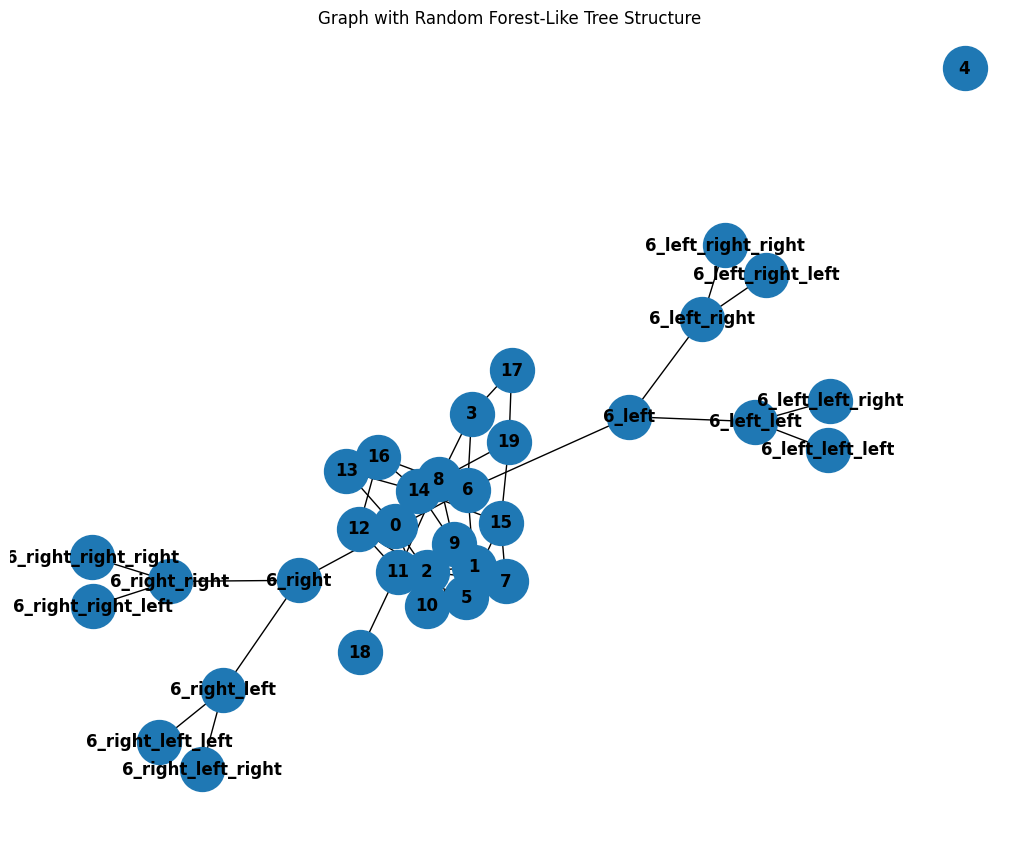

In [115]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def generate_random_forest_tree(graph, root, depth, max_depth):
    if depth == max_depth:
        return

    # Generate two child nodes for the current node
    left_child = f"{root}_left"
    right_child = f"{root}_right"

    # Add edges for the two child nodes
    graph.add_edge(root, left_child)
    graph.add_edge(root, right_child)

    # Recursively generate trees for the left and right children
    generate_random_forest_tree(graph, left_child, depth + 1, max_depth)
    generate_random_forest_tree(graph, right_child, depth + 1, max_depth)

# Generate an Erdos-Renyi graph
G = nx.erdos_renyi_graph(20, 0.2, seed=42)

# Set the maximum depth for the random forest-like tree
max_depth = 3

# Choose a root node
root_node = np.random.choice(list(G.nodes()))

# Add the root node to the graph
G.add_node(root_node)

# Generate the random forest-like tree structure
generate_random_forest_tree(G, root_node, 0, max_depth)

# Draw the graph with the random forest-like tree structure
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_color='black', font_weight='bold')

plt.title("Graph with Random Forest-Like Tree Structure")
plt.show()


In [114]:
nx.random_tree(30, 10)